In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

In [2]:
# Space parameters
Lx = 10       # x-dimension
Ly = 10       # y-dimension
dx = 0.05       # length of one element
dy = 0.05
Nx = int(Lx/dx) # number of x-elements (integer)
Ny = int(Ly/dy) # number of y-elements
Nel = Nx*Ny      # total number of elements

# Time parameters
T = 5         # total time
dt = 0.01      # timestep
Nt = int(T/dt) # number of timesteps (integer)

# Courant Stability
Cx2 = 0.5**2
Cy2 = 0.5**2
c = 0.1          # c = wave speed


In [12]:
x0 = np.linspace(0, Lx, Nx)    # x-discretization
y0 = np.linspace(0, Ly, Ny)    # y-discretization

xmesh, ymesh = np.meshgrid(x0, y0)

In [13]:
u = np.zeros((Nx, Ny, Nt))

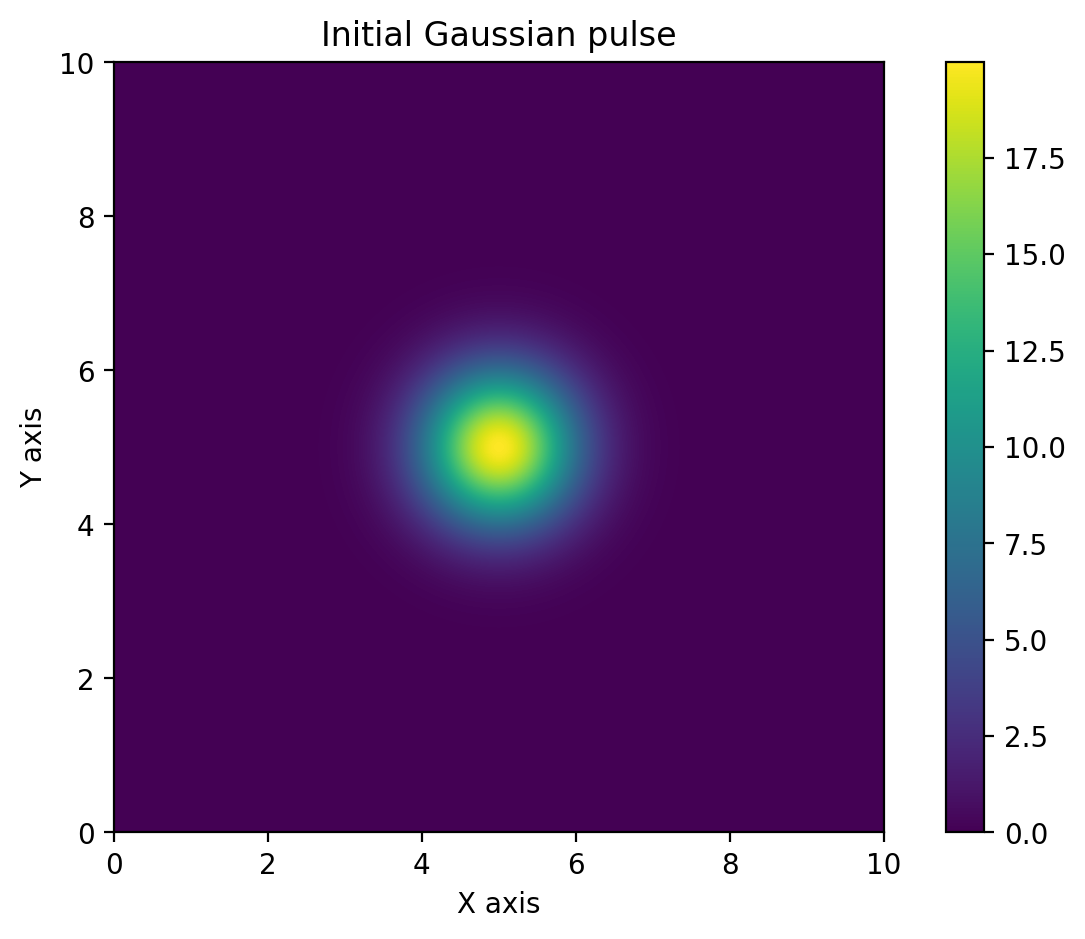

In [14]:
gauss = lambda x, mu, sig: ((x - mu)/2*sig)**2

A = 20    # amplitude
xo = 5    # x-mean
sigx = 2# x-std. deviation
yo = 5    # y-mean
sigy = 2# y-std. deviation

# Initial u (at t = 0)
uo = A*np.exp(-(gauss(xmesh, xo, sigx) + gauss(ymesh, yo, sigy)))
#uo = uo.T

# Plot initial gaussian pulse
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

im = ax.imshow(uo, vmin=abs(uo).min(), vmax=abs(uo).max(), \
               extent = [0, Lx, 0, Ly], interpolation='bilinear')
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_title("Initial Gaussian pulse")

plt.colorbar(im)
plt.show()


In [15]:
import time

# Initial condition
u[:,:,0] = uo

for y in range(1,Ny-1):
        for x in range(1,Nx-1):
            DxDx = Cx2*(u[x+1,y,0] - 2*u[x,y,0] + u[x-1,y,0])
            DyDy = Cy2*(u[x,y+1,0] - 2*u[x,y,0] + u[x,y-1,0])
            
            u[x,y,1] = u[x,y,0] + 0.5*(DxDx + DyDy)
# Time loop
t = 0
start = time.time()
for t in range(1, Nt-1):
    
    # Inner points: central difference scheme
    for y in range(1,Ny-1):
        for x in range(1,Nx-1):
            
            DxDx = Cx2*(u[x+1,y,t] - 2*u[x,y,t] + u[x-1,y,t])
            DyDy = Cy2*(u[x,y+1,t] - 2*u[x,y,t] + u[x,y-1,t])
            
            u[x,y,t+1] = 2*u[x,y,t] - u[x,y,t-1] + (DxDx + DyDy)
    
    # Dirichlet Boundary conditions
    u[0,:,t+1] = 0
    u[Lx,:,t+1] = 0
    u[:,0,t+1] = 0
    u[:,Ly,t+1] = 0

end = time.time()

MovieWriter imagemagick unavailable; using Pillow instead.


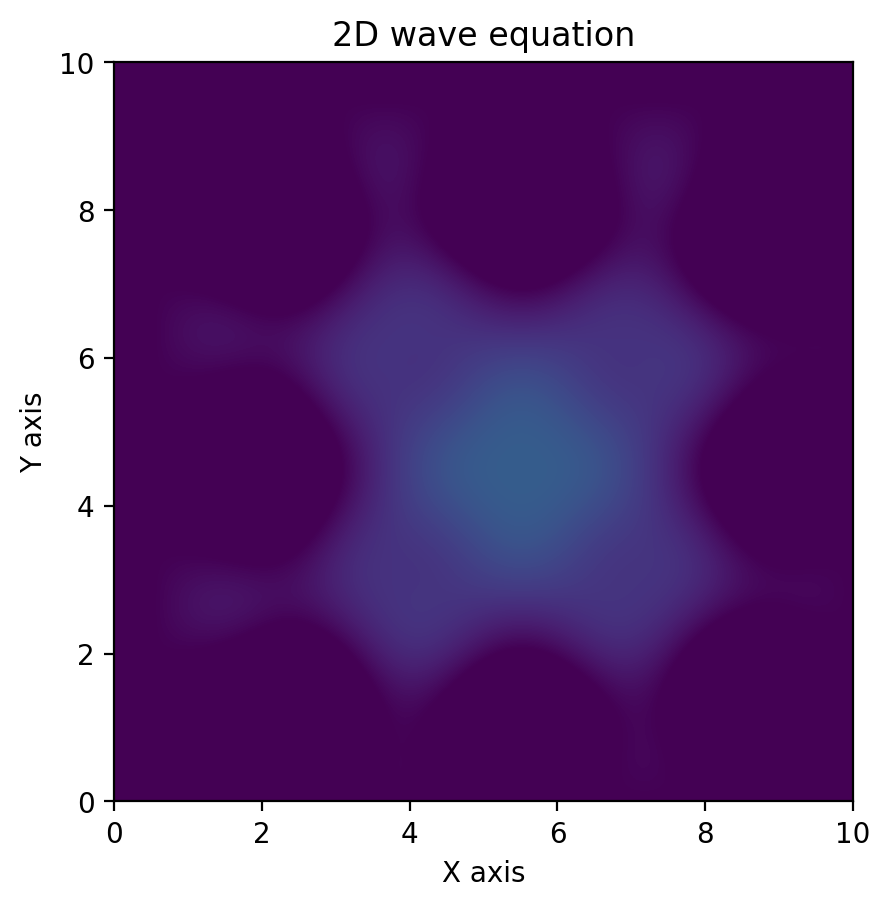

In [9]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_title("2D wave equation")

im = ax.imshow(uo, vmin=abs(uo).min(), vmax=abs(uo).max(), \
               extent = [0, Lx, 0, Ly], interpolation='bilinear')

def init():
    #im.set_data([],[])
    return [im]

def animate(i):
    a = im.get_array()
    a = u[:,:,i]
    im.set_array(a)
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=Nt, interval=10, blit=True)

#save animation like a gif
anim.save('wave_equation_2D.gif', writer='imagemagick', fps=30)

